<a href="https://colab.research.google.com/github/bougui505/alignscape/blob/master/alignscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
#@title 1. Install libraries

#@markdown ## Execute this cell by pressing the _Play_ button on the left to download and install prerequisites in this Colab notebook.

%load_ext autoreload
%autoreload 2
!git clone https://github.com/bougui505/alignscape
%cd alignscape
!git clone https://github.com/bougui505/quicksom
!pip install biopython
!pip install torch
!pip install functorch
!pip install dill
!pip install adjustText

In [2]:
%%capture
#@title 2. Import libraries

#@markdown ##Import needed libraries
from alignscape.analysis import classification
from alignscape.analysis import mutation_pathway
from alignscape.analysis import dmatrix
from alignscape import align_scape
from alignscape import plot_umat
from quicksom.som import SOM
import torch
import Bio
import sys
import os
from IPython.display import Image
import numpy as np
import time
import pandas as pd
import pickle

print(torch.cuda.is_available())

In [3]:
#@title 3. Load Multiple Sequence Alignment (MSA)

#@markdown ##Load the MSA from your local file system. The MSA should have a fasta format, with "-" dashes at the the insertion
#@markdown ####If upload is canceled the following cell will use Human Kinome MSA as a test case

from google.colab import files
fl=files.upload();
with open("seq.aln","w") as infile:
    for key in fl:
        text=fl[key].decode()
        infile.write(text)

In [ ]:
#@title 4. Compute the Self Organizing Map

#@markdown ##Run the cell to compute the SOM
somside = 90
nepochs = 100
alpha = 0.5
sigma = np.sqrt(somside*somside)/4.0
start = time.time()
test_aln = '/content/alignscape/data/Human_kinome/human_kinome_noPLK5.aln'
if np.genfromtxt('seq.aln').size > 0:
  align_scape.main(ali="seq.aln", batch_size=10,
               outname="som", somside=somside, nepochs=nepochs,
               scheduler="exp", alpha=alpha, sigma= sigma)
else:
  align_scape.main(ali=test_aln, batch_size=10,
               outname="som", somside=somside, nepochs=nepochs,
               scheduler="exp", alpha=alpha, sigma= sigma)
end = time.time()
print(end - start)

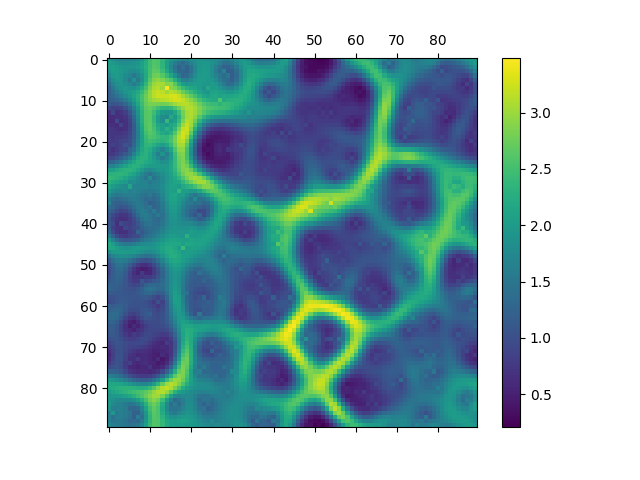

In [6]:
#@markdown  ## 5.1 UMAT
plot_umat.main('/content/alignscape/som.pickle',
               hideSeqs=True, outname='umat')
Image('/content/alignscape/umat.png')

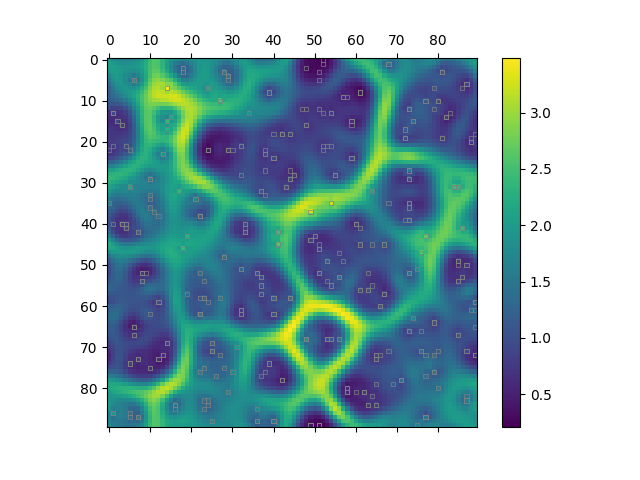

In [7]:
#@markdown  ## 5.2 UMAT with mapped sequences
plot_umat.main('/content/alignscape/som.pickle',
               outname='umat_remapped')
Image('/content/alignscape/umat_remapped.png')

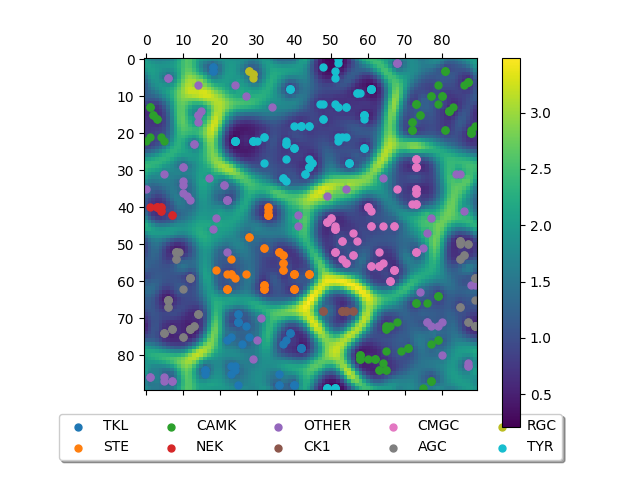

In [8]:
#@markdown  ## 5.3 UMAT with labeled sequences
plot_umat.main('/content/alignscape/som.pickle',
               delimiter='_',
               outname='umat_labeled')
Image('/content/alignscape/umat_labeled.png')

computing localadj between queries


100%|██████████| 30876/30876 [06:36<00:00, 77.83it/s]


computing localadj between queries done: 0:06:36.840403
compute the mstree
compute the mstree done: 0:00:00.016351


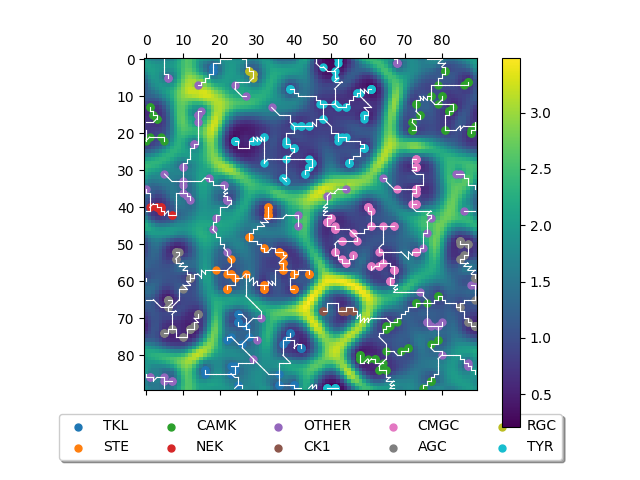

In [9]:
#@markdown  ## 5.4 UMAT with the minimal spanning tree (MST) between sequences
plot_umat.main('/content/alignscape/som.pickle',
               delimiter='_',
               outname='umat_minsptree',
               mst=True)
Image('/content/alignscape/umat_minsptree.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.299216
0:00:00.000847


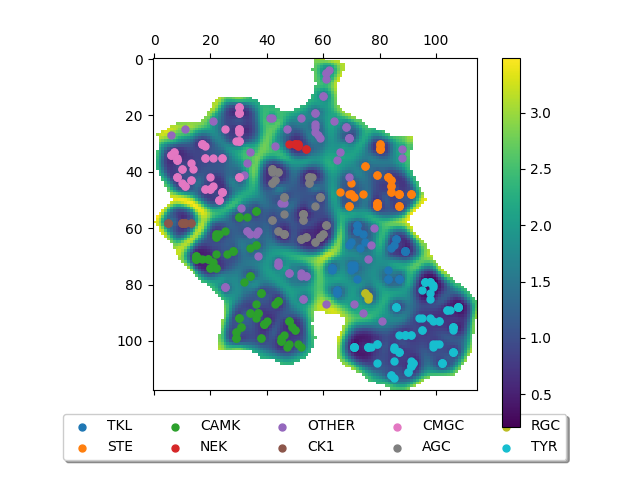

In [10]:
#@markdown  ## 5.5 Unfolded UMAT
plot_umat.main('/content/alignscape/som.pickle',
               delimiter='_',
               outname='umat_unfold',
               unfold=True)
Image('/content/alignscape/umat_unfold.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.203208
get the minsptree paths in the unfold umat
get the minsptree paths in the unfold umat done: 0:00:26.721216
0:00:00.000002
35.927319049835205


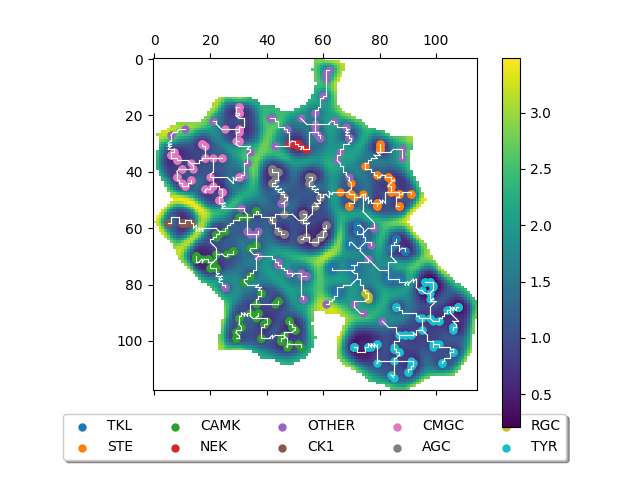

In [11]:
#@markdown  ## 5.6 Unfolded UMAT with MST
start = time.time()
plot_umat.main('/content/alignscape/som.pickle',
               delimiter='_',
               outname='umat_minsptree_unfold',
               mst=True,
               unfold=True)
end = time.time()
print(end - start)
Image('/content/alignscape/umat_minsptree_unfold.png')

clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:33.296701


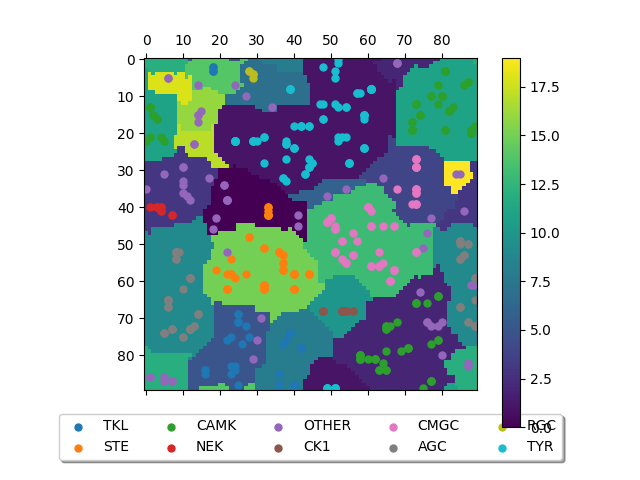

In [12]:
#@markdown  ## 5.7 Clustered UMAT
plot_umat.main('/content/alignscape/som.pickle',
               delimiter='_',
               outname='umat_clst',
               clst=True)
Image('/content/alignscape/umat_clst.png')

clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:32.463719


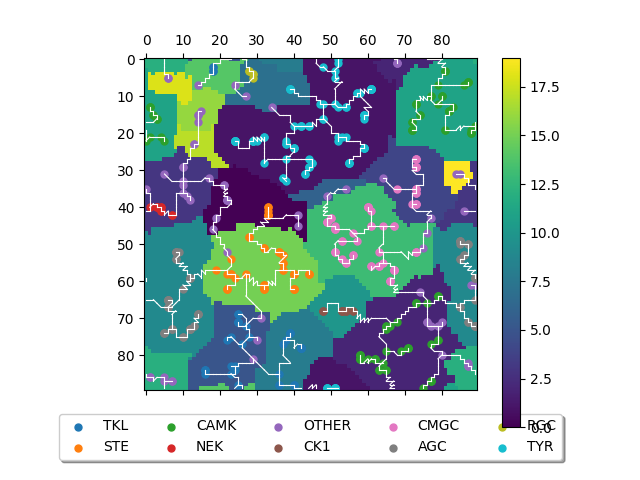

In [13]:
#@markdown  ## 5.8 Clustered UMAT with MST
plot_umat.main('/content/alignscape/som.pickle',
               outname='umat_minsptree_clst',
               delimiter='_',
               hideSeqs=False,
               mst=True,
               clst=True,
               unfold=False)
Image('/content/alignscape/umat_minsptree_clst.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.391993
0:00:00.002355
clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:32.866585


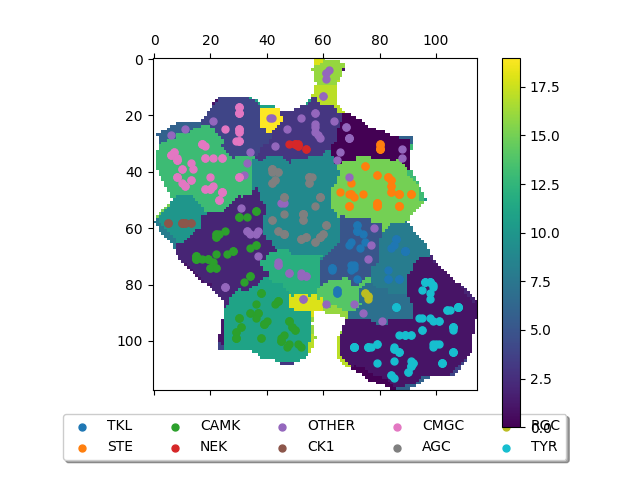

In [14]:
#@markdown  ## 5.9 Clustered and unfolded UMAT
plot_umat.main('/content/alignscape/som.pickle',
               outname='umat_unfold_clst',
               delimiter='_',
               hideSeqs=False,
               mst=False,
               clst=True,
               unfold=True)
Image('/content/alignscape/umat_unfold_clst.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.171699
get the minsptree paths in the unfold umat
get the minsptree paths in the unfold umat done: 0:00:26.465020
0:00:00.000003
clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:32.897063


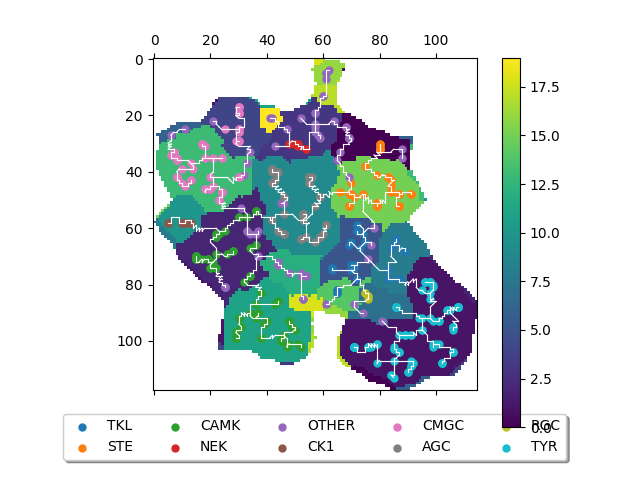

In [15]:
#@markdown  ## 5.10 Clustered and unfolded UMAT with MST
plot_umat.main('/content/alignscape/som.pickle',
               outname='umat_minsptree_unfold_clst',
               delimiter='_',
               hideSeqs=False,
               mst=True,
               clst=True,
               unfold=True)
Image('/content/alignscape/umat_minsptree_unfold_clst.png')

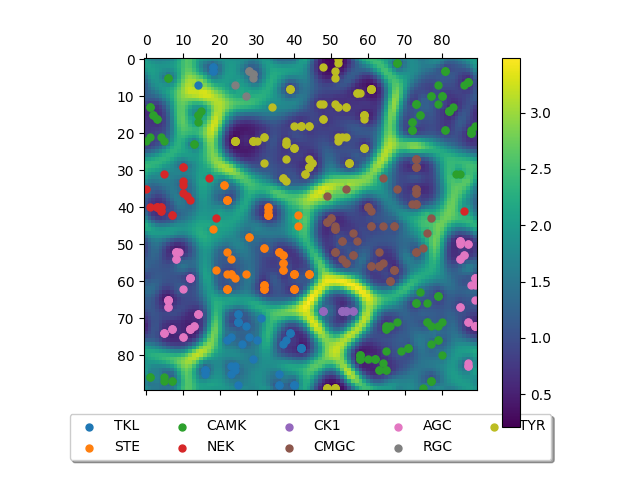

In [16]:
#@markdown  ## 6. Classification of unclassified sequences ('OTHER')
classification.main(somfile='/content/alignscape/som.pickle',
                    outname='classification',
                    delimiter='_',
                    uclass='OTHER',
                    k=1,
                    plot_ext='png')
Image('/content/alignscape/classification.png')

In [17]:
df = pd.read_csv('/content/alignscape/classification.csv')
df

,AAK1,CAMK
0,BMP2K,CAMK
1,BUB1,CAMK
2,BUB1B,CAMK
3,CDC7,CMGC
4,CHUK,CAMK
...,...,...
60,WEE2,NEK
61,WNK1,STE
62,WNK2,STE
63,WNK3,STE


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


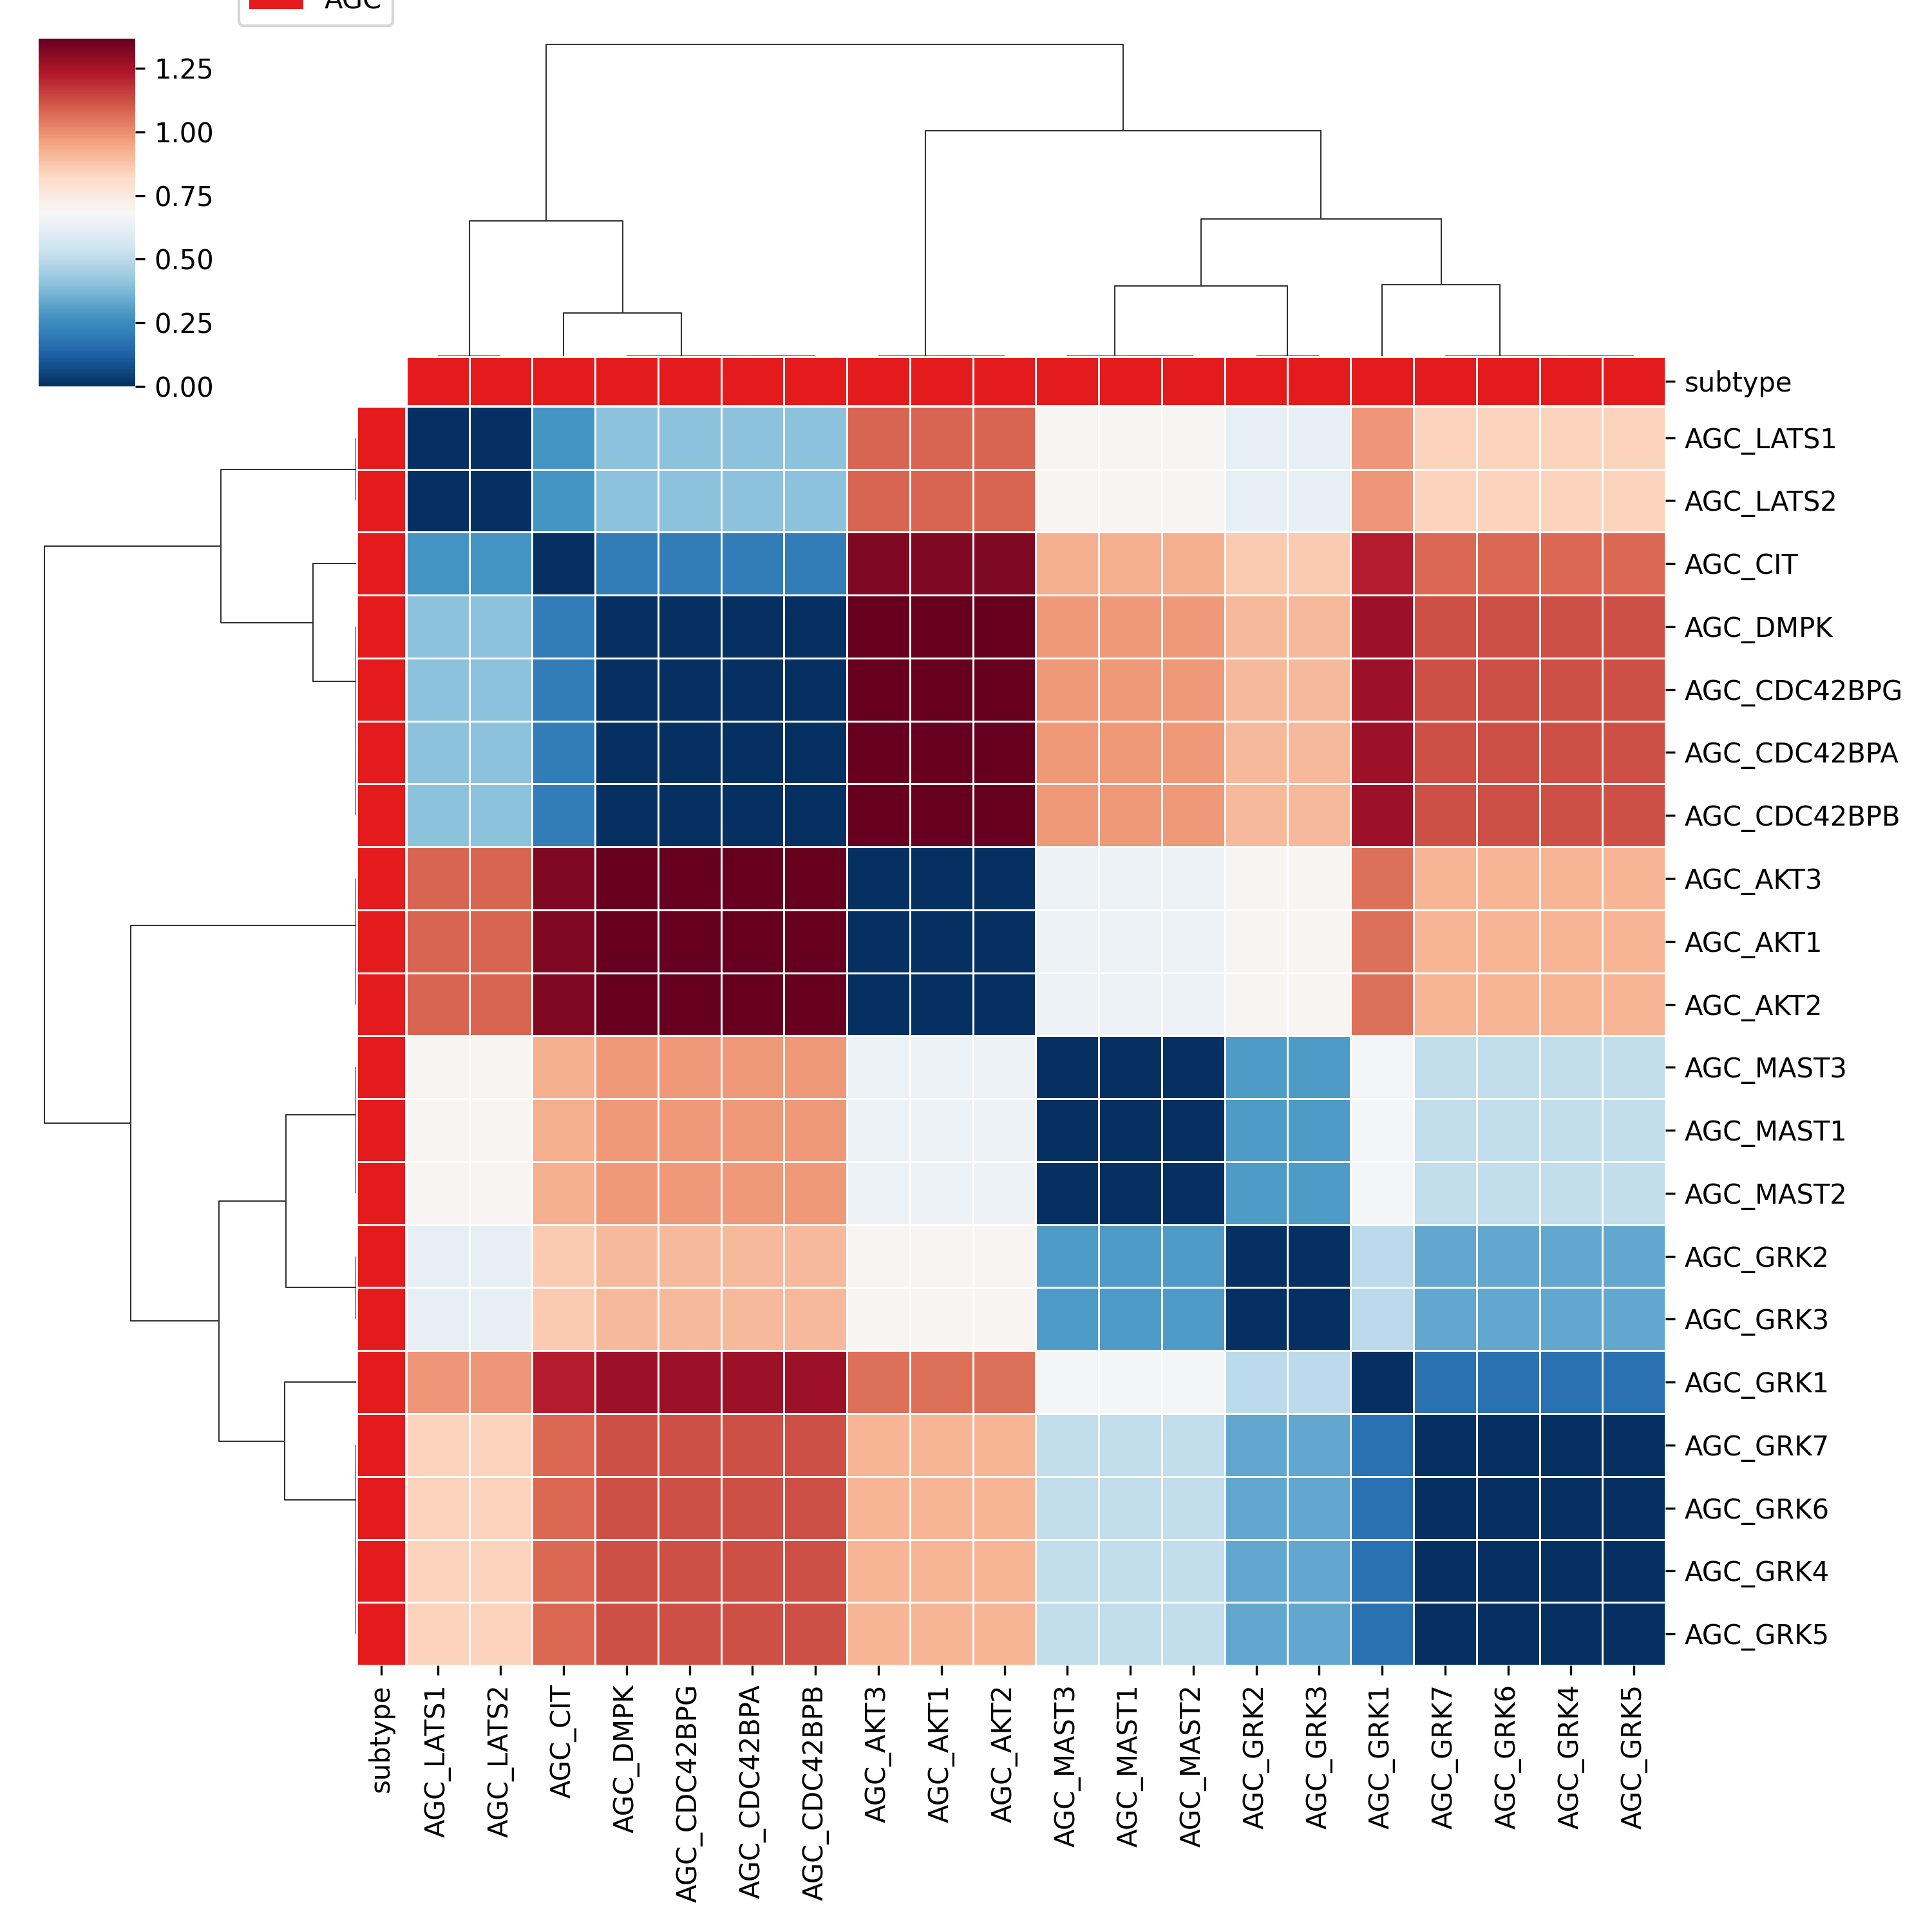

In [18]:
#@markdown  ## 7. Distance Matrix calculation
with open('/content/alignscape/som.pickle', 'rb') as somfileaux:
  somobj=pickle.load(somfileaux)
dmobj=dmatrix.Dmatrix(somfile='/content/alignscape/som.pickle',
                      querieslist=somobj.labels[0:20],
                      output='dmatrix',
                      delimiter='_')
Image('/content/alignscape/dmatrix.png', width=500, height=500)

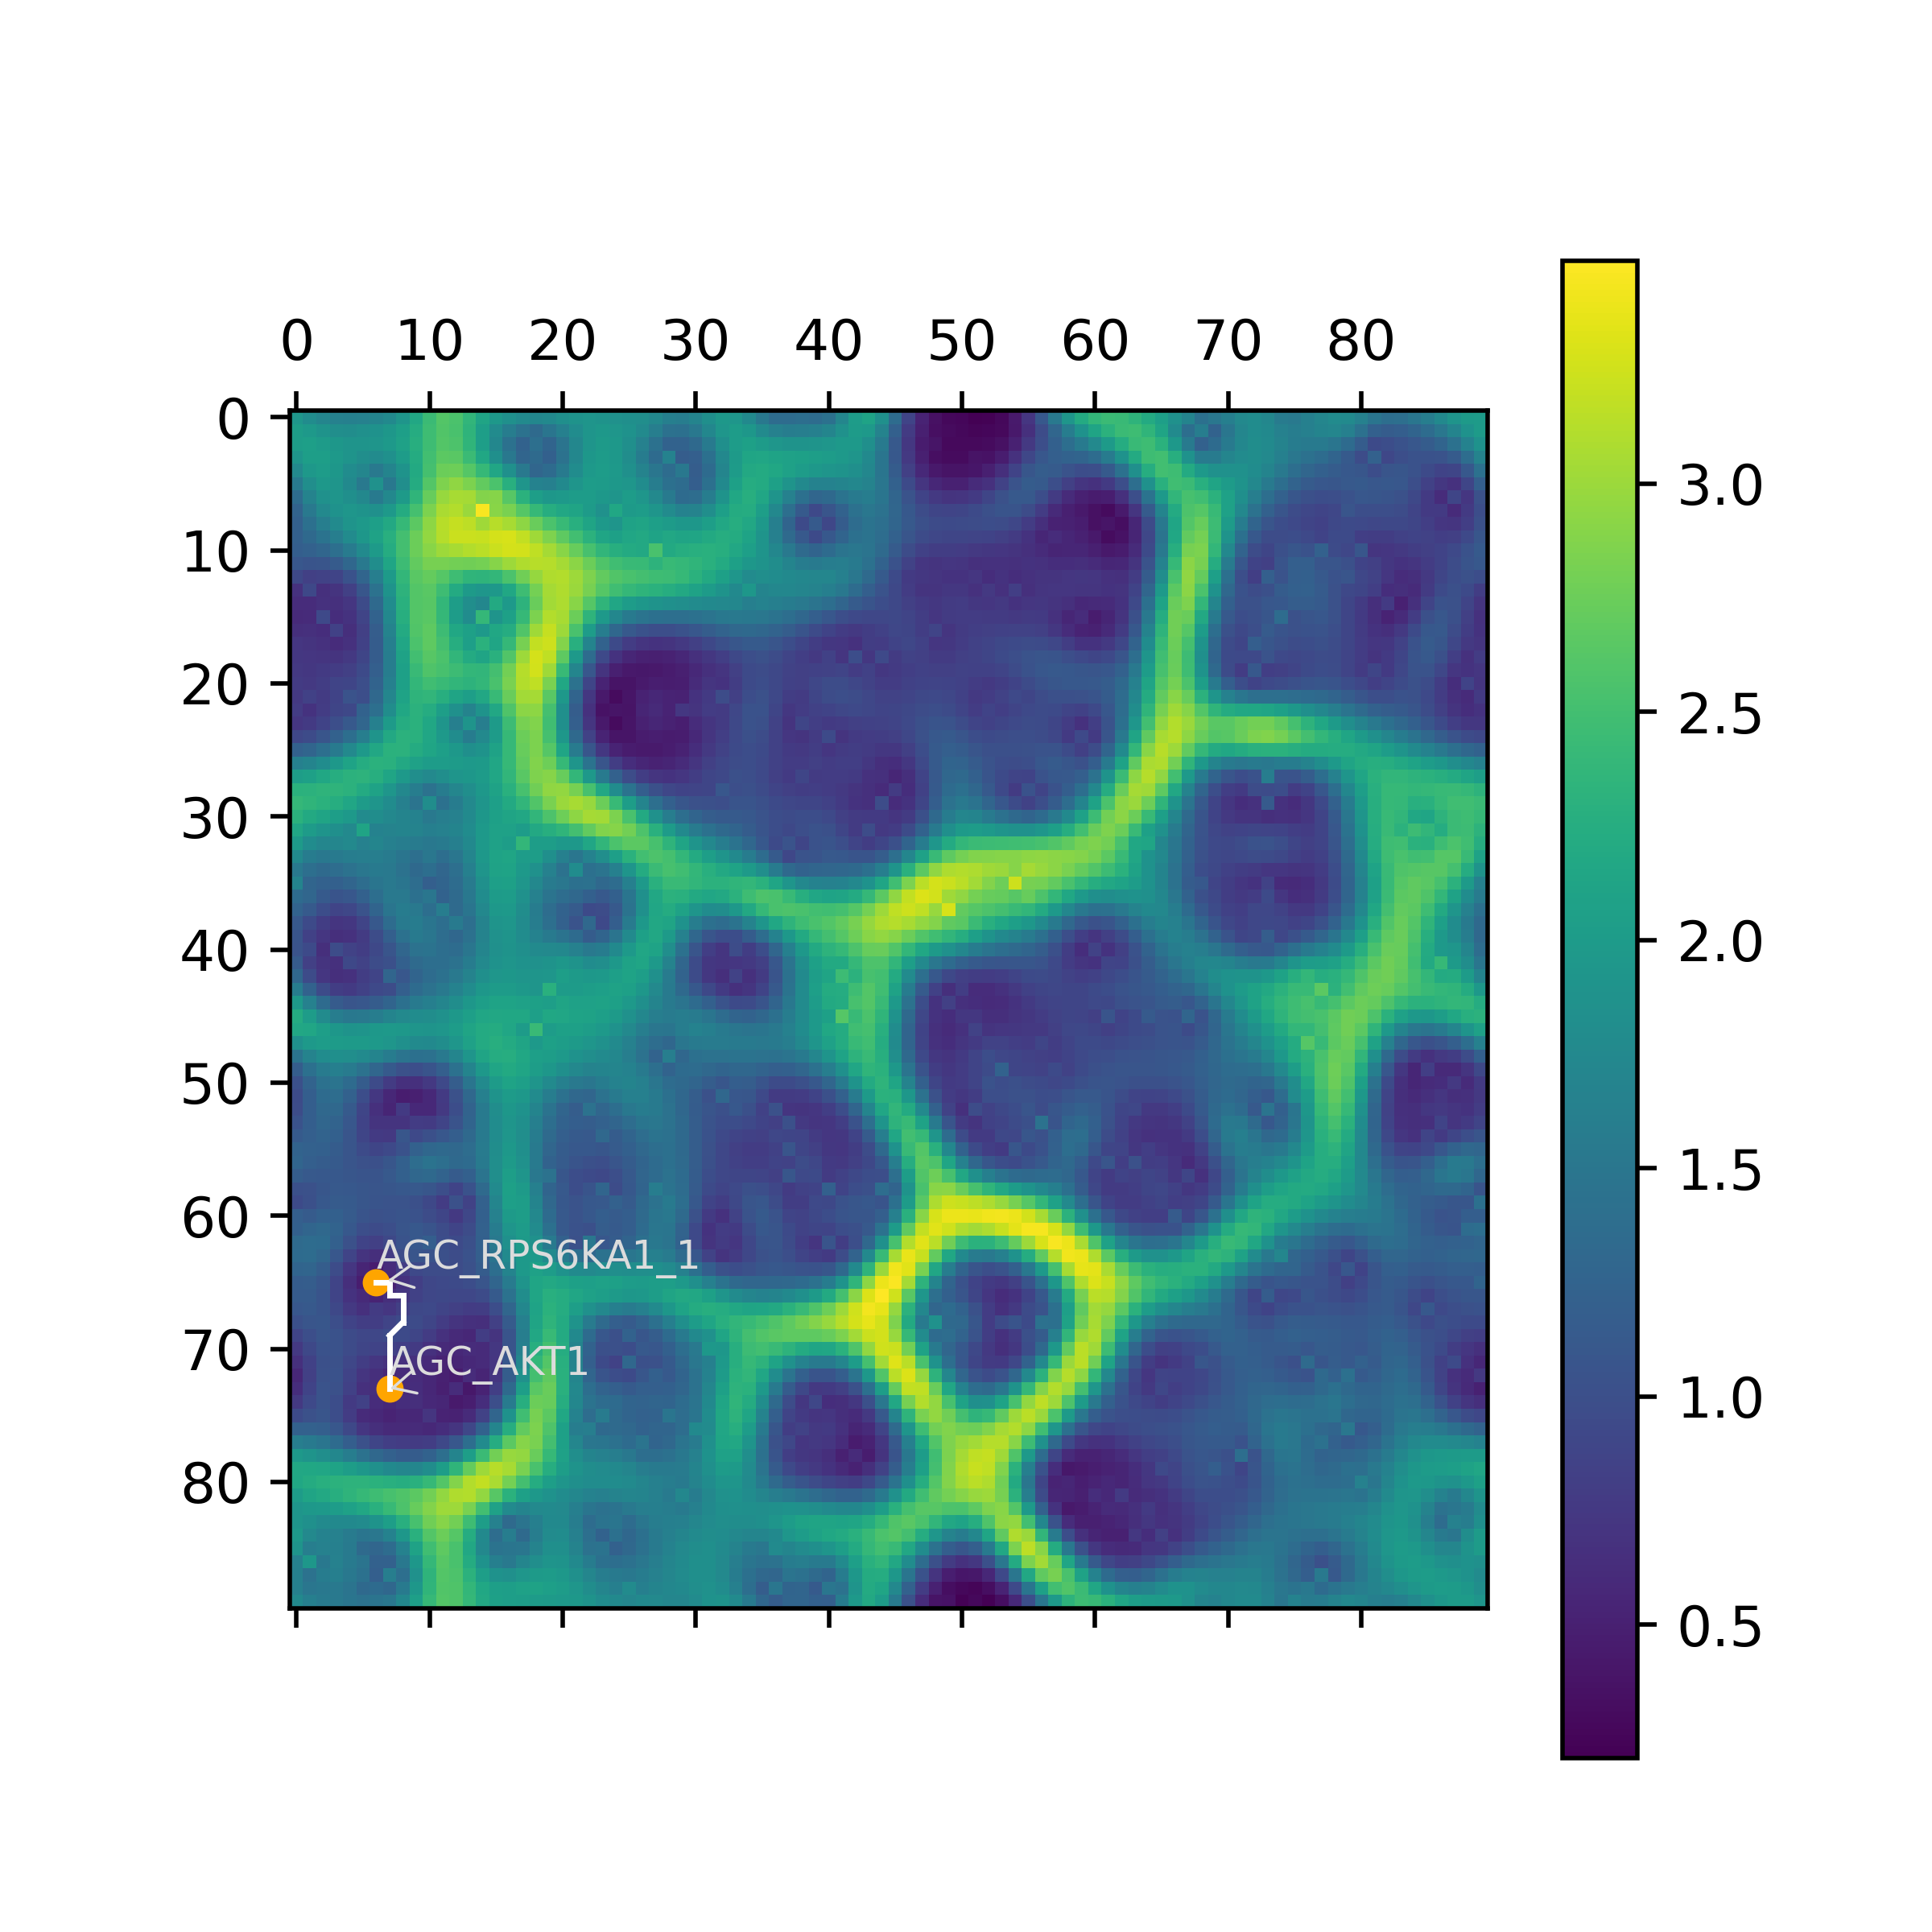

In [19]:
#@markdown  ## 8. Mutation Pathway
mutation_pathway.main(unit1=somobj.bmus[0],
                      unit2=somobj.bmus[45],
                      somfile='/content/alignscape/som.pickle',
                      outname='mutation_pathway',
                      verbose=False)
Image('/content/alignscape/mutation_pathway.png', width=500, height=500)

In [20]:
with open("mutation_pathway.fasta", "r") as seqfile:
   for line in seqfile.readlines(): print(line)

>[65|6] AGC_RPS6KA1_1

FELL--KVLGQGSYGKVFLVRKVTGSD--AGKLYAMKVLKKATLKVRD----RVRTKMERDILEEV-----NHPFIVKLHYAFQTEG------KLYLILDFLRGGDLFTRLSKEV----------------MFTEEDVKFYLAELALALDHLHSL--GIIYRDLKPENILLDE--------EGHIKLTDFGLSKESIDHEKKA-----------YSFCGTIEYMAPEVVNR------RGHT-QSVDWWSLGVLMFEMLTG-ALPFQG-------KDRKETMRLILKAKLGMPQFLS--------------------------------------PEAQSLLRRLLKRNPANRLGAGPDGAEEIKRHPFF

>[65|7]

FELL--KVLGQGSYGKVFLVRKVTG-D--AGKLYAMKVLKKATLKVRD----RVRTKMERDILEEV-----NHPFIVKLHYAFQTEG------KLYLILDYLRGGDLFTRLSKEV----------------MFTEEDVKFYLAEIALALDHLHSL--GIIYRDLKPENILLDE--------EGHIKLTDFGLSKESIDHEKKA-----------YSFCGTIEYMAPEVVNR------RGHG-QSVDWWSLGVLMFEMLTG-ALPFQG-------KDRKETMRLILKAKLGMPQFLS--------------------------------------PEAQSLLRRLLKRNPANRLGAGPDGAEEIKRHPFF

>[66|7]

FELL--KVLGQGSYGKVFLVRKVTG-D--AGKLYAMKVLKKATLVVRDK---RVHTKMERDILEEV-----NHPFIVKLHYAFQTEG------KLYLILDYLRGGDLFTHLSKEV----------------MFTEEDVKFYLAEIALALDHLHSL--GIIYRDLKPENILLDE--------EGHIKLTDFGLSKESIDHEKKA-----------YSF

In [21]:
#@markdown ##Download everything locally to a .tar.gz
from google.colab import files
!tar -zcvf alignscape_analysis.tar.gz *.png *.csv *.fasta
files.download('alignscape_analysis.tar.gz')
!tar -zcvf alignscape.tar.gz som.log som_bmus.txt som_umat.npy som.pickle
files.download('alignscape.tar.gz')

classification.png
dmatrix.png
mutation_pathway.png
som_umat.png
umat_clst.png
umat_labeled.png
umat_minsptree_clst.png
umat_minsptree.png
umat_minsptree_unfold_clst.png
umat_minsptree_unfold.png
umat.png
umat_remapped.png
umat_unfold_clst.png
umat_unfold.png
classification.csv
mutation_pathway.fasta


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

som.log
som_bmus.txt
som_umat.npy
som.pickle


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>